In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import codecs
import collections

### Define

In [3]:
home = "SWANS"
away = "MUFC"

### Load Data and Preprocessing

In [4]:
# Read file
tweets_file = open("../../EPLdata/1508310000_SWANSvsMUFC.txt", "r")

In [5]:
# Parsing JSON

tweets_data = []
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [6]:
tweets_file.close()

In [7]:
print len(tweets_data)

30659


In [8]:
tweets_data[30658]['text']

u'Good at times this game but #MUFC inparticular have not really been at the races.'

### Create DataFrame as tweets

In [9]:
tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)
tweets['hashtags'] = map(lambda tweet: map(lambda tag: tag['text'], tweet['entities']['hashtags']), tweets_data)

In [10]:
# 0: no tags, 3: both team tags, 1: only home team tags, 2: only away team tags, 4: other tags
def find_tag(tag):
    if not tag:
        return 0
    if home in tag and away in tag:
        return 3
    if home in tag:
        return 1
    if away in tag:
        return 2
    else:
        return 4

tweets["tag_num"] = map(lambda tags: find_tag(tags), tweets['hashtags'])

In [11]:
tweets.head()

,text,lang,country,hashtags,tag_num
0,@Tomapapa Le pongo una moneda al #Swans contra...,es,None,"[Swans, EPL]",4
1,game on #MUFC 👏👏👏,en,None,[MUFC],2
2,We caught the W this morning #COD now #mufc ha...,en,None,"[COD, mufc, GGMU]",4
3,RT @brightidol_af9: Seed Chart อันดับ3 ขอบคุณ...,th,None,[mufc],4
4,RT @ManUtd_JP: アップ中のルーニー( @WayneRooney )とダルミアン...,ja,None,[mufc],4


In [12]:
home_hashtags = len(tweets[tweets["tag_num"] == 1])
away_hashtags = len(tweets[tweets["tag_num"] == 2])
both_hashtags = len(tweets[tweets["tag_num"] == 3])
no_hashtags = len(tweets[tweets["tag_num"] == 4])
other_hashtags = len(tweets[tweets["tag_num"] == 0])

print "Home Team Tags: ", home_hashtags
print "Away Team Tags: ", away_hashtags
print "Both Team Tags: ", both_hashtags
print "Other Team Tags: ", other_hashtags
print "No Tags: \t", no_hashtags
print "All Tweets: ", len(tweets)

Home Team Tags:  78
Away Team Tags:  11410
Both Team Tags:  137
Other Team Tags:  532
No Tags: 	18502
All Tweets:  30659


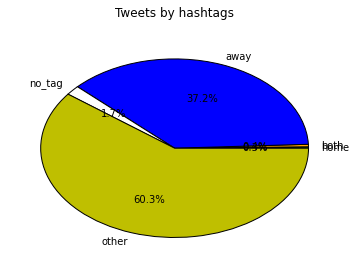

In [13]:
# Plot Hashtags Pie
slices = [home_hashtags, both_hashtags, away_hashtags, other_hashtags, no_hashtags]
activities = ['home','both','away', 'no_tag', 'other']
cols = ['g','orange','b', 'w', 'y']

plt.pie(slices,
        labels=activities,
        colors=cols,
        autopct='%1.1f%%')

plt.title('Tweets by hashtags\n')
plt.show()

### Top 5 languages

en     24314
ar      1425
und     1256
in      1036
es       681
dtype: int64

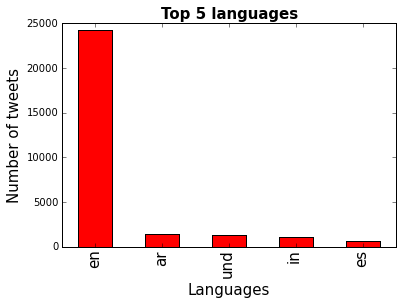

In [14]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')
tweets_by_lang[:5]

### Top 5 countries

United Kingdom    166
United States     111
Malaysia           97
Indonesia          51
India              44
dtype: int64

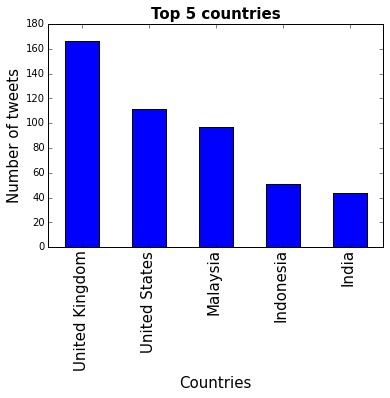

In [15]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')
tweets_by_country[:5]

In [15]:
# tweets_by_country

In [16]:
print "country: ", sum(tweets_by_country)
print "None: ", len(tweets_data) - sum(tweets_by_country)

country:  784
None:  29875


### Count All Words

In [17]:
tweets_eng = tweets[tweets["lang"] == "en"]
tweets_eng.head()

,text,lang,country,hashtags,tag_num
1,game on #MUFC 👏👏👏,en,None,[MUFC],2
2,We caught the W this morning #COD now #mufc ha...,en,None,"[COD, mufc, GGMU]",4
6,RT @ManUtd: The teams are now walking out onto...,en,None,[mufc],4
7,GLORY GLORY @ManUtd #MUFC,en,None,[MUFC],2
9,RT @ManUtd: The skipper's all smiles following...,en,None,[mufc],4


In [18]:
print len(tweets_eng)

24314


In [19]:
# create all words lists
all_words = []

for tweet in tweets_eng["text"]:
    tweet_words = word_tokenize(tweet)
    for word in tweet_words:
        all_words.append(word.lower())

In [20]:
# count all words
counted_all_words = collections.Counter(all_words)
counted_all_words.most_common()[:20]

[(u'#', 46899),
 (u':', 29539),
 (u'mufc', 22446),
 (u'@', 16567),
 (u'rt', 14372),
 (u'.', 12388),
 (u'the', 9578),
 (u'manutd', 8942),
 (u'http', 8380),
 (u'!', 6452),
 (u'-', 6177),
 (u'swansea', 5603),
 (u'a', 5576),
 (u'to', 5087),
 (u',', 5030),
 (u"'", 4974),
 (u'united', 4708),
 (u'swans', 4020),
 (u'on', 3491),
 (u'for', 3339)]

### Extract Adjective Words

In [31]:
tweets_eng['text'][11013]

u'RT @vancole9: After Chelsea losing points yest.. 3 points for #mufc is key today!'

In [32]:
nltk.pos_tag(word_tokenize(tweets_eng['text'][11013]))

[(u'RT', 'NN'),
 (u'@', 'IN'),
 (u'vancole9', 'NNP'),
 (u':', ':'),
 (u'After', 'IN'),
 (u'Chelsea', 'NNP'),
 (u'losing', 'VBG'),
 (u'points', 'NNS'),
 (u'yest..', 'NNP'),
 (u'3', 'CD'),
 (u'points', 'NNS'),
 (u'for', 'IN'),
 (u'#', '#'),
 (u'mufc', 'NN'),
 (u'is', 'VBZ'),
 (u'key', 'JJ'),
 (u'today', 'NN'),
 (u'!', '.')]

In [33]:
# create J all words lists
all_J_words = []

#  j is adject, r is adverb, and v is verb
#allowed_word_types = ["J","R","V"]
allowed_word_types = ["J"]

for tweet in tweets_eng["text"]:
    
    tweet_words = word_tokenize(tweet)
    
    tweet_words_pos = nltk.pos_tag(tweet_words)
    
    for word in tweet_words_pos:
        if word[1][0] in allowed_word_types and word[0][0] != "/":
            all_J_words.append(word[0].lower())

In [34]:
# count J all words
counted_all_J_words = collections.Counter(all_J_words)
counted_all_J_words.most_common()[:20]

[(u'key', 610),
 (u'free-kick', 521),
 (u'kick-off', 519),
 (u'close', 500),
 (u'bastian', 490),
 (u'good', 441),
 (u'more', 379),
 (u'crucial', 320),
 (u'clean', 315),
 (u'wide', 296),
 (u'voetbal', 281),
 (u'few', 253),
 (u'low', 244),
 (u'new', 234),
 (u'yellow', 230),
 (u'late', 226),
 (u'first', 216),
 (u'french', 210),
 (u'little', 206),
 (u'separate', 196)]

In [35]:
counted_all_J_words.most_common()

[(u'key', 610),
 (u'free-kick', 521),
 (u'kick-off', 519),
 (u'close', 500),
 (u'bastian', 490),
 (u'good', 441),
 (u'more', 379),
 (u'crucial', 320),
 (u'clean', 315),
 (u'wide', 296),
 (u'voetbal', 281),
 (u'few', 253),
 (u'low', 244),
 (u'new', 234),
 (u'yellow', 230),
 (u'late', 226),
 (u'first', 216),
 (u'french', 210),
 (u'little', 206),
 (u'separate', 196),
 (u'top', 193),
 (u'best', 191),
 (u'important', 183),
 (u'pre-match', 145),
 (u'better', 133),
 (u'half-time', 127),
 (u"'shit", 127),
 (u'hear', 127),
 (u'closer', 119),
 (u'last', 113),
 (u'great', 112),
 (u'50th', 107),
 (u'additional', 102),
 (u'minimum', 101),
 (u'fourth', 101),
 (u'game-high', 88),
 (u'defensive', 88),
 (u'live', 75),
 (u'creative', 69),
 (u"c'mon", 68),
 (u'nervous', 66),
 (u'free', 64),
 (u'mufclive', 61),
 (u'watch', 60),
 (u'darmian', 60),
 (u'third', 58),
 (u'many', 54),
 (u'early', 53),
 (u'worst', 52),
 (u'main', 52),
 (u'strong', 51),
 (u'officialtallal', 47),
 (u'slow', 44),
 (u'competitive', 

In [ ]:
# tweets.head()
# tweets.tail()
# tweets.columns
# tweets.values
# tweets.values[0]
tweets.describe()
# tweets.T
# tweets.sort_index(axis=1, ascending=False)
# tweets.sort(columns='lang')
# tweets['lang']
# tweets.text
# tweets[0:5]
# tweets.loc[:,['text','country']]
# tweets.loc[1:7,['text','lang']]
# tweets.loc[1,['text','lang']]
# tweets.iloc[1:3, 0:3]
# tweets.groupby(['lang', 'country']).sum()

### Tweets Sentiment

In [36]:
# sentiment_mod.py
import sentiment_mod as s

In [38]:
print tweets_eng['text'][11013]
print s.sentiment(tweets_eng['text'][11013])

RT @vancole9: After Chelsea losing points yest.. 3 points for #mufc is key today!
('pos', 0.6)


In [39]:
home_tweets = tweets_eng[tweets_eng["tag_num"] == 1]
away_tweets = tweets_eng[tweets_eng["tag_num"] == 2]

In [40]:
home_tweets.head()

,text,lang,country,hashtags,tag_num
436,Haha how daft from City to announce De Bruyne ...,en,None,"[mufc, SWANS]",1
1478,"XI Inicial del #SWANS: Fabianski, Naughton, Fe...",en,None,[SWANS],1
2014,Friends of the #SWANS,en,None,[SWANS],1
3371,RT @FutbolElineas: XI Inicial del #SWANS: Fabi...,en,None,[SWANS],1
6181,#SWANS have settled into this game well. Some ...,en,None,"[SWANS, BPL]",1


In [41]:
away_tweets.head()

,text,lang,country,hashtags,tag_num
1,game on #MUFC 👏👏👏,en,None,[MUFC],2
7,GLORY GLORY @ManUtd #MUFC,en,None,[MUFC],2
12,RT @premierleague: KICK-OFF #MUFC get us under...,en,None,"[MUFC, SWAMUN]",2
16,RT @premierleague: KICK-OFF #MUFC get us under...,en,None,"[MUFC, SWAMUN]",2
22,Kickoff: Swansea City vs Manchester United. #G...,en,None,"[GGMU, MUFC]",2


In [43]:
import pandas as pd

In [44]:
home_tweets = pd.DataFrame(home_tweets.values, range(len(home_tweets)), home_tweets.columns)
away_tweets = pd.DataFrame(away_tweets.values, range(len(away_tweets)), away_tweets.columns)

In [45]:
home_tweets.head()

,text,lang,country,hashtags,tag_num
0,Haha how daft from City to announce De Bruyne ...,en,None,"[mufc, SWANS]",1
1,"XI Inicial del #SWANS: Fabianski, Naughton, Fe...",en,None,[SWANS],1
2,Friends of the #SWANS,en,None,[SWANS],1
3,RT @FutbolElineas: XI Inicial del #SWANS: Fabi...,en,None,[SWANS],1
4,#SWANS have settled into this game well. Some ...,en,None,"[SWANS, BPL]",1


In [46]:
away_tweets.head()

,text,lang,country,hashtags,tag_num
0,game on #MUFC 👏👏👏,en,None,[MUFC],2
1,GLORY GLORY @ManUtd #MUFC,en,None,[MUFC],2
2,RT @premierleague: KICK-OFF #MUFC get us under...,en,None,"[MUFC, SWAMUN]",2
3,RT @premierleague: KICK-OFF #MUFC get us under...,en,None,"[MUFC, SWAMUN]",2
4,Kickoff: Swansea City vs Manchester United. #G...,en,None,"[GGMU, MUFC]",2


## Sentiment Analysis

In [47]:
home_sent = map(lambda tweet: s.sentiment(tweet)[0], home_tweets["text"])

In [48]:
away_sent = map(lambda tweet: s.sentiment(tweet)[0], away_tweets["text"])

In [49]:
print "Home Team:", collections.Counter(home_sent)
print "Away Team:", collections.Counter(away_sent)

Home Team: Counter({'neg': 45, 'pos': 7})
Away Team: Counter({'neg': 7315, 'pos': 1615})


In [50]:
home_sent = collections.Counter(home_sent)
away_sent = collections.Counter(away_sent)

Positive Tweets:  7
Negative Tweets:  45


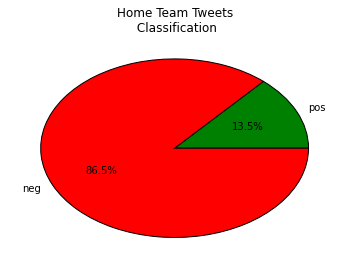

In [51]:
slices = [home_sent['pos'], home_sent['neg']]
activities = ['pos', 'neg']
cols = ['g','r']

plt.pie(slices,
        labels=activities,
        colors=cols,
        autopct='%1.1f%%')

plt.title('Home Team Tweets \n Classification')

print "Positive Tweets: ", home_sent['pos']
print "Negative Tweets: ", home_sent['neg']

plt.show()

Positive Tweets:  1615
Negative Tweets:  7315


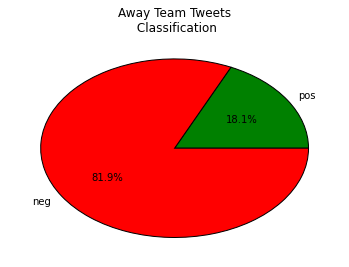

In [52]:
slices = [away_sent['pos'], away_sent['neg']]
activities = ['pos', 'neg']
cols = ['g','r']

plt.pie(slices,
        labels=activities,
        colors=cols,
        autopct='%1.1f%%')

plt.title('Away Team Tweets \n Classification')

print "Positive Tweets: ", away_sent['pos']
print "Negative Tweets: ", away_sent['neg']

plt.show()